<a href="https://colab.research.google.com/github/catavasia/ML_FIAN-21/blob/main/seminar03_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing dataset

Use the data and model from the seminar:

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
columns = ["CRIM", "RM", "LSTAT"]

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)[columns]
X /= X.max()
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)

model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=0.1)
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  19.312028078112938
test mse =  8.517501881762888


# Task 1

Use `sklearn.model_selection.cross_validate` to perform K-fold cross-validation of the model above. Plot histograms of train and test scores (`"neg_mean_squared_error"`) on the same plot.

Do that for 10 and 100 folds.

See the docs for more details about the function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [4]:
from sklearn.model_selection import cross_validate

# 10 folds

In [21]:
cv_results_10 = cross_validate(model, X, y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

In [22]:
cv_results_10

{'fit_time': array([0.01638675, 0.01756787, 0.01834893, 0.01870036, 0.01720071,
        0.01714563, 0.01780748, 0.01724315, 0.00764036, 0.02792382]),
 'score_time': array([0.00201654, 0.00204062, 0.00205445, 0.00203729, 0.00200844,
        0.00204253, 0.00228667, 0.0019877 , 0.00185823, 0.00208545]),
 'test_score': array([  -7.20636571,   -6.61068729,   -4.15868207,  -24.7825149 ,
         -17.72468543,  -20.63837964,  -15.54042827, -106.53803875,
         -18.75457154,  -14.01189426]),
 'train_score': array([-19.41000981, -19.55200553, -19.74665546, -17.92316363,
        -18.3512475 , -18.34681105, -18.82330278, -10.74271081,
        -18.3496723 , -18.61162265])}

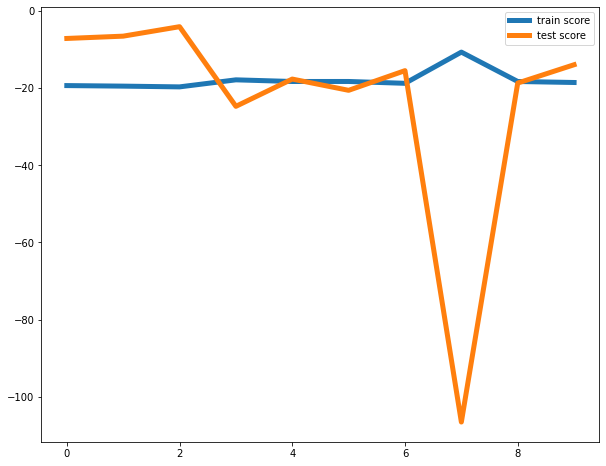

In [31]:
plt.figure(figsize=(10,8))
plt.plot(cv_results_10['train_score'], label='train score', linewidth=5)
plt.plot(cv_results_10['test_score'], label='test score', linewidth=5)
plt.legend()

# 100 folds

In [28]:
cv_results_100 = cross_validate(model, X, y, cv=100, scoring='neg_mean_squared_error', return_train_score=True)

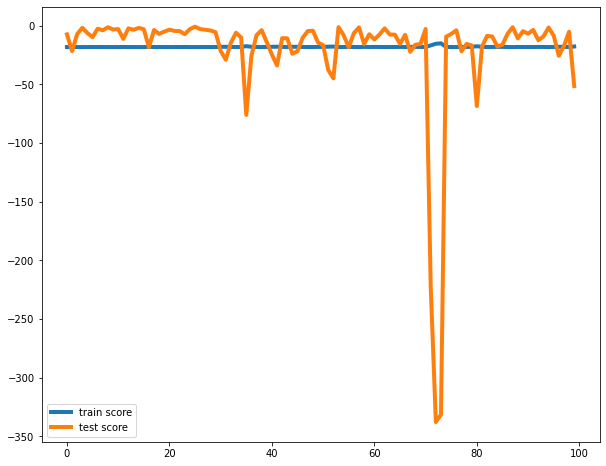

In [33]:
plt.figure(figsize=(10,8))
plt.plot(cv_results_100['train_score'], label='train score', linewidth=4)
plt.plot(cv_results_100['test_score'], label='test score', linewidth=4)
plt.legend()